In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

# Data Cleaning:

In [4]:
class Data:
    def __init__(self, dataset):
        
        '''loading dataframes'''
        
        self.dataset = dataset
        self.process_data()
        
    def process_data(self):
        self._create_df()
        self._column_info()
        self._print_df_stats()
        self._check_duplicates()
       
    def _create_df(self):
        '''loads and prepares dataframe'''
        self.df = self._load_dataset(dataset)        
        
    def _column_info(self):
        self.cat_cols = self._cat_cols(self.df)
        self.num_cols = self._num_cols(self.df)
        
    def _print_df_stats(self):
        print('  \n ----------Train Data Info---------')
        self.printstats(self.df)
        self._check_nan(self.df)
    
    def _load_dataset(self, file):
        return pd.read_excel(file)
    
    def printstats(self, df):
        print('---------------------------------------------------------')
        print('Shape of Dataframe - {}'.format(df.shape))
        print('---------------------------------------------------------')
        print('\n Dataframe Info: \n')
        print('n{}'.format(df.info()))
        print('---------------------------------------------------------')
        print(' Categorical Features Stats: \n \n{}'.format(df.describe(include='O')))
        print('-------------------------------------------------')
        print(' Numerical Features Stats:- \n \n{}'.format(df.describe()))
    def _check_nan(self, df):
        '''Checks and verifies presence of null values in Dataframe'''
        nan = np.sum(df.isna().sum())
        if nan == 0:
            print('\n\n : There are no null values in the dataframes')
        else:
            print('The following columns have null values\n\n{}'.format(df.isnull().sum()))
              
    def _cat_cols(self, df):
        '''finds and lists Categorical Columns in Dataframe'''
        self.cat_cols = df.select_dtypes(include=['O']).columns.tolist()
        print('Categorical Columns list: {}'.format(self.cat_cols))
        print('---------------------------------------------------------------------')
        return self.cat_cols
              
    def _num_cols(self, df):
        '''finds and lists Numerical Columns in Dataframe'''
        self.num_cols = df.select_dtypes(exclude=['O']).columns.tolist()
        print('Numerical Columns list: {}'.format(self.num_cols))
        print('---------------------------------------------------------------------')
        return self.num_cols
              
             
    def _check_duplicates(self):
        '''Checks presence of duplicate entries'''
        print('\n : There are {} duplicate values in the Dataframe'.format(self.df.duplicated().sum()))

In [10]:
import os
os.chdir('A:\CapstoneProject1\Project3\Project 3 datasets')

In [15]:
dataset = "./train.xlsx"

In [16]:
data = Data(dataset)

Categorical Columns list: ['InvoiceNo', 'StockCode', 'Description', 'Country']
---------------------------------------------------------------------
Numerical Columns list: ['Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID']
---------------------------------------------------------------------
  
 ----------Train Data Info---------
---------------------------------------------------------
Shape of Dataframe - (379336, 8)
---------------------------------------------------------

 Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379336 entries, 0 to 379335
Data columns (total 8 columns):
InvoiceNo      379336 non-null object
StockCode      379336 non-null object
Description    378373 non-null object
Quantity       379336 non-null int64
InvoiceDate    379336 non-null datetime64[ns]
UnitPrice      379336 non-null float64
CustomerID     285076 non-null float64
Country        379336 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage

1. Perform a preliminary data inspection and data cleaning.

a. Check for missing data and formulate an apt strategy to treat them.

b. Remove duplicate data records.

c. Perform descriptive analytics on the given data.

In [17]:
print(data.df.shape)
data.df.head()


(379336, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,NaN,United Kingdom
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom


In [18]:
data.df.Quantity[data.df.Quantity < 0].count()

7386

In [19]:
data.df.UnitPrice[data.df.UnitPrice < 0].count()

1

In [20]:
data.df['CustomerID'].nunique()

4353

We notice from the information above that we have 135080 null values for customerID. We will have to remove all the entries without customerID because we cannot perform segmentation and cohort analysis on Customers that we cannot identify.

The 'Quantity' and 'UnitPrice' features have negative numbers. We will have to remove these numbers, as they are not realistic. They are probably returns or reversed transactions that were not concluded.

We also notice that we have 1454 null values for Description. This column has no real effect on the data, and we may end up removing it altogether.

We can see here that there are 4372 Unique Customers in this dataset.

Finally, we notice the presence of 5268 duplicate entries, and we have to remove those, to avoid distorting the model

## We shall confirm below that these issues have been dealt with by checking again for null values and duplicates, and also for entries remaining, which contain negative price numbers (indicating reversed transactions and incomplete orders)

In [21]:
data.df.dropna(inplace=True)
print('Null Values after handling:') 
data.df.isnull().sum()

Null Values after handling:


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [22]:
data.df.drop_duplicates(subset=None, keep='first', inplace=True)
data.df.duplicated().sum()

0

In [23]:
data.df = data.df[data.df['Quantity'] > 0]
print(data.df['Quantity'].min())
data.df = data.df[data.df['UnitPrice'] > 0]
print(data.df['UnitPrice'].min())

1
0.001


In [24]:
data.df.shape

(276190, 8)

In [25]:
total_orders = data.df.groupby(['CustomerID'])['InvoiceNo'].nunique()
multiple_orders = np.sum(total_orders > 1) / data.df['CustomerID'].nunique()
print(f'{100 * multiple_orders:.2f}% of customers ordered more than once.')

64.91% of customers ordered more than once.


Here we shall engineer a new feature TotalPrice to properly reflect how much a customer pays for a particular order. We do that by multiplying unit price by quantity of items purchased.

We shall also create another instance of the dataset called retail_data and use that for the Cohort Analysis

In [26]:
data.df['TotalPrice'] = data.df['Quantity'] * data.df['UnitPrice']
data.df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,30.00
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,5.10
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,0.85
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,19.50
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom,15.00


In [27]:
#Get rid of irrelevant features in the dataset in preparation fotr Cohort Analysis
retail_data = data.df.loc[:, ['Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'TotalPrice']]
retail_data.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
1,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,30.00
2,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,5.10
3,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,0.85
4,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,19.50
5,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom,15.00


# Data Transformation:

## 2. Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts.

a. Create month cohorts and analyze active customers for each cohort.

b. Analyze the retention rate of customers.

In [28]:
#Define functions to extract month and day

def get_month(x):
    return dt.datetime(x.year, x.month, 1)

def get_day(x):
    return dt.datetime(x.year, x.month, x.day, 1)

def get_date(df, month_column, day_column):
    '''extracting year, month and day integer values'''
    year = df[month_column].dt.year
    month = df[month_column].dt.month
    day = df[day_column].dt.day
    return year, month, day

#Assigning for monthly acquisition cohorts
retail_data['InvoiceMonth'] = retail_data['InvoiceDate'].apply(get_month)
month_grouping = retail_data.groupby('CustomerID')['InvoiceMonth']
retail_data['CohortMonth'] = month_grouping.transform('min')

#Assigning for daily acquisition cohorts
retail_data['InvoiceDay'] = retail_data['InvoiceDate'].apply(get_day)
day_grouping = retail_data.groupby('CustomerID')['InvoiceDay']
retail_data['CohortDay'] = day_grouping.transform('min')

retail_data.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,CohortMonth,InvoiceDay,CohortDay
1,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,30.00,2011-06-01,2011-02-01,2011-06-08 01:00:00,2011-02-16 01:00:00
2,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,5.10,2011-05-01,2010-12-01,2011-05-04 01:00:00,2010-12-05 01:00:00
3,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,0.85,2011-01-01,2010-12-01,2011-01-20 01:00:00,2010-12-08 01:00:00
4,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,19.50,2010-12-01,2010-12-01,2010-12-10 01:00:00,2010-12-10 01:00:00
5,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom,15.00,2011-05-01,2011-02-01,2011-05-08 01:00:00,2011-02-04 01:00:00


###Here we have created features that represent the cohorts that each customer belongs to, and we have done this on a monthly and daily basis.

### Assigning time offset in months and days

In [29]:
invoice_year, invoice_month, invoice_day = get_date(retail_data, 'InvoiceMonth', 'InvoiceDay')
cohort_year, cohort_month, cohort_day = get_date(retail_data, 'CohortMonth', 'CohortDay')

years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month
days_diff = invoice_day - cohort_day

retail_data['IndexMonths'] = years_diff * 12 + months_diff + 1
retail_data['IndexDays'] = years_diff * 365 + months_diff * 30 + days_diff + 1

retail_data.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,CohortMonth,InvoiceDay,CohortDay,IndexMonths,IndexDays
1,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,30.00,2011-06-01,2011-02-01,2011-06-08 01:00:00,2011-02-16 01:00:00,5,113
2,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,5.10,2011-05-01,2010-12-01,2011-05-04 01:00:00,2010-12-05 01:00:00,6,155
3,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,0.85,2011-01-01,2010-12-01,2011-01-20 01:00:00,2010-12-08 01:00:00,2,48
4,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,19.50,2010-12-01,2010-12-01,2010-12-10 01:00:00,2010-12-10 01:00:00,1,1
5,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom,15.00,2011-05-01,2011-02-01,2011-05-08 01:00:00,2011-02-04 01:00:00,4,95


## Counting Monthly active customers from each Cohort

In [30]:
month_group = retail_data.groupby(['CohortMonth', 'IndexMonths'])
cohort_data_month = month_group['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_counts_mnth = cohort_data_month.pivot(index='CohortMonth',
                                            columns='IndexMonths',
                                            values='CustomerID')

cohort_counts_mnth

IndexMonths,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,872.0,319.0,276.0,331.0,316.0,347.0,316.0,300.0,306.0,343.0,326.0,433.0,228.0
2011-01-01,416.0,92.0,112.0,97.0,136.0,117.0,105.0,102.0,127.0,136.0,154.0,52.0,NaN
2011-02-01,377.0,71.0,71.0,103.0,102.0,92.0,93.0,100.0,94.0,114.0,26.0,NaN,NaN
2011-03-01,450.0,66.0,112.0,90.0,101.0,75.0,119.0,102.0,124.0,37.0,NaN,NaN,NaN
2011-04-01,299.0,62.0,60.0,60.0,58.0,68.0,65.0,78.0,21.0,NaN,NaN,NaN,NaN
2011-05-01,283.0,53.0,48.0,49.0,58.0,68.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,244.0,41.0,37.0,62.0,55.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,190.0,35.0,38.0,43.0,54.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,168.0,35.0,41.0,40.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#Daily active customers from each Cohort
day_group = retail_data.groupby(['CohortDay', 'IndexDays'])
cohort_data_days = day_group['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_counts_days = cohort_data_days.pivot(index='CohortDay',
                                            columns='IndexDays',
                                            values='CustomerID')

print(cohort_counts_days.shape)
cohort_counts_days.head()

(305, 374)


IndexDays,1,2,3,4,5,6,7,8,9,10,...,365,366,367,368,369,370,371,372,373,374
CohortDay,,,,,,,,,,,,,,,,,,,,,
2010-12-01 01:00:00,93.0,6.0,3.0,NaN,5.0,6.0,3.0,9.0,7.0,5.0,...,6.0,7.0,8.0,NaN,2.0,5.0,6.0,6.0,7.0,5.0
2010-12-02 01:00:00,93.0,NaN,NaN,NaN,2.0,6.0,3.0,7.0,4.0,NaN,...,6.0,4.0,NaN,NaN,4.0,2.0,4.0,3.0,2.0,NaN
2010-12-03 01:00:00,45.0,NaN,1.0,1.0,1.0,NaN,3.0,NaN,NaN,1.0,...,3.0,NaN,2.0,2.0,3.0,1.0,2.0,NaN,NaN,NaN
2010-12-05 01:00:00,69.0,2.0,3.0,1.0,4.0,1.0,NaN,6.0,7.0,2.0,...,6.0,2.0,3.0,4.0,3.0,1.0,NaN,NaN,NaN,NaN
2010-12-06 01:00:00,70.0,2.0,2.0,1.0,1.0,NaN,1.0,3.0,8.0,3.0,...,3.0,3.0,6.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN


## Calculating Cohort Metrics - Monthly & Daily
1. Retention Rate

In [32]:
#Monthly Retention Rates

cohort_sizes_mnth = cohort_counts_mnth.iloc[:,0]
monthly_retention = cohort_counts_mnth.divide(cohort_sizes_mnth, axis=0)
monthly_retention.round(5) * 100

IndexMonths,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,36.583,31.651,37.959,36.239,39.794,36.239,34.404,35.092,39.335,37.385,49.656,26.147
2011-01-01,100.0,22.115,26.923,23.317,32.692,28.125,25.240,24.519,30.529,32.692,37.019,12.500,NaN
2011-02-01,100.0,18.833,18.833,27.321,27.056,24.403,24.668,26.525,24.934,30.239,6.897,NaN,NaN
2011-03-01,100.0,14.667,24.889,20.000,22.444,16.667,26.444,22.667,27.556,8.222,NaN,NaN,NaN
2011-04-01,100.0,20.736,20.067,20.067,19.398,22.742,21.739,26.087,7.023,NaN,NaN,NaN,NaN
2011-05-01,100.0,18.728,16.961,17.314,20.495,24.028,26.502,9.541,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,16.803,15.164,25.410,22.541,33.197,9.426,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.421,20.000,22.632,28.421,11.053,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.833,24.405,23.810,12.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#Daily Retention Rates

cohort_sizes_days = cohort_counts_days.iloc[:,0]
daily_retention = cohort_counts_days.divide(cohort_sizes_days, axis=0)
(daily_retention.round(5) * 100).head()

IndexDays,1,2,3,4,5,6,7,8,9,10,...,365,366,367,368,369,370,371,372,373,374
CohortDay,,,,,,,,,,,,,,,,,,,,,
2010-12-01 01:00:00,100.0,6.452,3.226,NaN,5.376,6.452,3.226,9.677,7.527,5.376,...,6.452,7.527,8.602,NaN,2.151,5.376,6.452,6.452,7.527,5.376
2010-12-02 01:00:00,100.0,NaN,NaN,NaN,2.151,6.452,3.226,7.527,4.301,NaN,...,6.452,4.301,NaN,NaN,4.301,2.151,4.301,3.226,2.151,NaN
2010-12-03 01:00:00,100.0,NaN,2.222,2.222,2.222,NaN,6.667,NaN,NaN,2.222,...,6.667,NaN,4.444,4.444,6.667,2.222,4.444,NaN,NaN,NaN
2010-12-05 01:00:00,100.0,2.899,4.348,1.449,5.797,1.449,NaN,8.696,10.145,2.899,...,8.696,2.899,4.348,5.797,4.348,1.449,NaN,NaN,NaN,NaN
2010-12-06 01:00:00,100.0,2.857,2.857,1.429,1.429,NaN,1.429,4.286,11.429,4.286,...,4.286,4.286,8.571,4.286,1.429,NaN,NaN,NaN,NaN,NaN


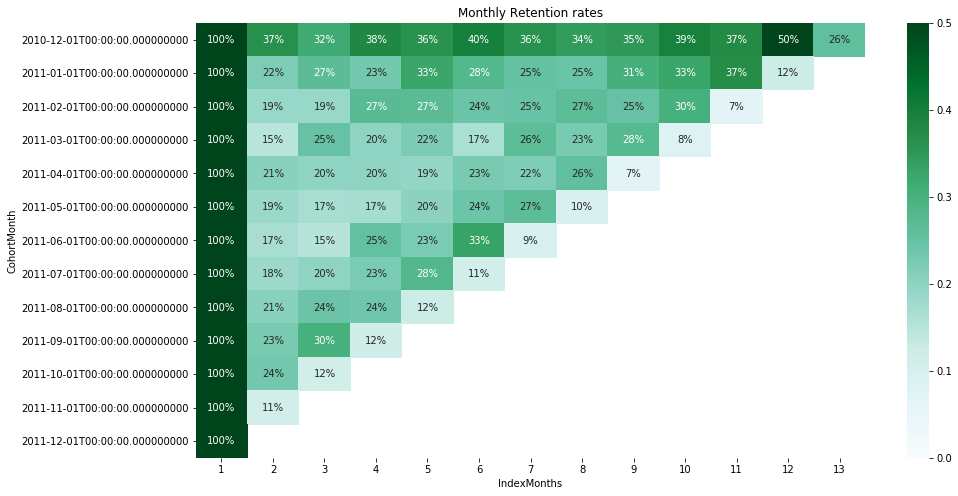

In [36]:
plt.figure(figsize=(15, 8))
plt.title('Monthly Retention rates')
sns.heatmap(data = monthly_retention,
           annot = True,
           fmt = '.0%',
           vmin = 0.0,
           vmax = 0.5,
           cmap = 'BuGn')

plt.show()

2. Average Quantity

In [37]:
#Monthly Average Quantity

cohort_data_month = month_group['Quantity'].mean().reset_index()
average_quantity_mnth = cohort_data_month.pivot(index='CohortMonth',
                                            columns='IndexMonths',
                                            values='Quantity')

average_quantity_mnth.round(3)

IndexMonths,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,11.742,15.206,15.322,14.977,13.712,14.481,15.214,15.195,17.266,16.396,18.217,13.064,14.915
2011-01-01,21.024,15.214,15.322,14.235,13.722,18.534,15.947,16.676,13.774,12.293,9.862,14.538,NaN
2011-02-01,11.098,13.105,19.885,12.014,12.233,13.139,13.546,13.128,11.748,12.481,15.304,NaN,NaN
2011-03-01,9.682,12.478,13.401,9.759,14.270,11.971,13.853,14.899,10.387,7.926,NaN,NaN,NaN
2011-04-01,9.913,10.367,10.358,11.395,11.395,8.413,10.314,9.629,7.310,NaN,NaN,NaN,NaN
2011-05-01,12.233,9.698,12.968,16.226,11.495,8.588,10.911,160.117,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.678,13.161,11.037,13.756,10.274,9.933,10.082,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,9.759,13.236,8.845,10.283,7.227,7.434,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,10.183,6.530,5.566,6.378,7.164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
#Daily Average Quantity

cohort_data_days = day_group['Quantity'].mean().reset_index()
average_quantity_days = cohort_data_days.pivot(index='CohortDay',
                                            columns='IndexDays',
                                            values='Quantity')

(average_quantity_days.round(2)).head()

IndexDays,1,2,3,4,5,6,7,8,9,10,...,365,366,367,368,369,370,371,372,373,374
CohortDay,,,,,,,,,,,,,,,,,,,,,
2010-12-01 01:00:00,12.83,7.41,13.74,NaN,4.58,10.03,8.81,13.60,7.21,5.78,...,20.80,7.26,7.00,NaN,9.32,16.56,12.28,21.16,10.03,22.84
2010-12-02 01:00:00,15.85,NaN,NaN,NaN,75.71,18.02,11.91,14.02,45.12,NaN,...,31.43,38.10,NaN,NaN,11.91,83.40,17.84,12.52,18.04,NaN
2010-12-03 01:00:00,10.64,NaN,4.19,1.88,2.00,NaN,7.81,NaN,NaN,17.50,...,22.48,NaN,4.85,4.68,15.03,9.80,5.90,NaN,NaN,NaN
2010-12-05 01:00:00,6.25,22.34,8.86,30.00,4.04,2.05,NaN,7.85,12.16,3.43,...,4.32,28.59,6.35,6.50,17.30,19.00,NaN,NaN,NaN,NaN
2010-12-06 01:00:00,7.20,4.25,21.56,9.21,2.92,NaN,2.19,9.20,5.14,9.38,...,15.75,22.44,18.79,16.12,18.67,NaN,NaN,NaN,NaN,NaN


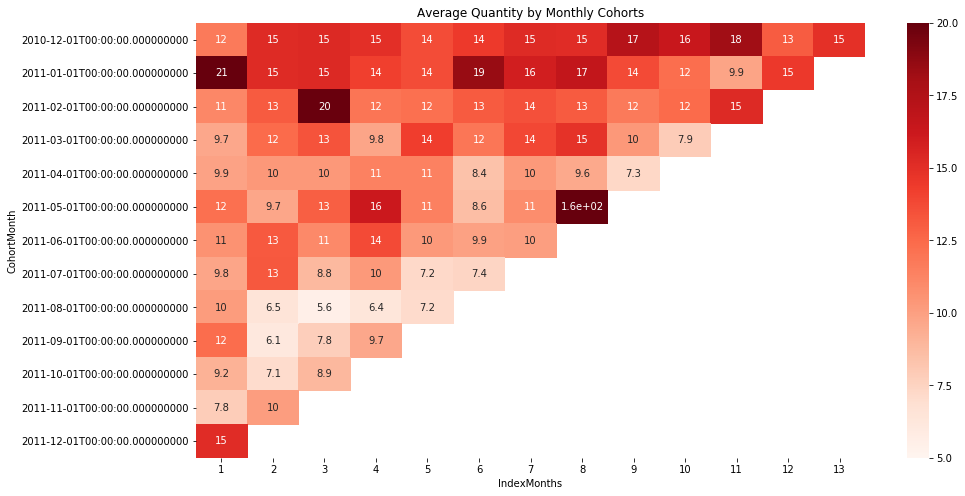

In [40]:
plt.figure(figsize=(15, 8))
plt.title('Average Quantity by Monthly Cohorts')
sns.heatmap(data = average_quantity_mnth,
           annot = True,
            vmin = 5.0,
            vmax = 20.0,
           cmap = 'Reds')

plt.show()

3. Average Price

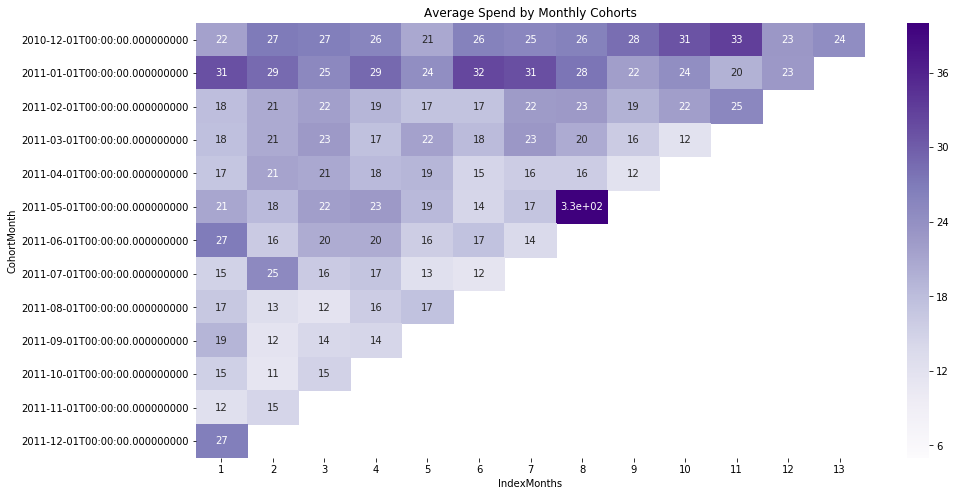

In [41]:
#Monthly Average Price

cohort_data_month = month_group['TotalPrice'].mean().reset_index()
average_price_mnth = cohort_data_month.pivot(index='CohortMonth',
                                            columns='IndexMonths',
                                            values='TotalPrice')


#Daily Average Price

cohort_data_days = day_group['TotalPrice'].mean().reset_index()
average_price_days = cohort_data_days.pivot(index='CohortDay',
                                            columns='IndexDays',
                                            values='TotalPrice')

plt.figure(figsize=(15, 8))
plt.title('Average Spend by Monthly Cohorts')
sns.heatmap(data = average_price_mnth,
           annot = True,
            vmin = 5.0,
            vmax = 40.0,
           cmap = 'Purples')

plt.show()

# Data Modeling :

1. Build a RFM (Recency Frequency Monetary) model. Recency means the number of days since a customer made the last purchase. Frequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. Monetary is the total amount of money a customer spent in that given period. Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP.

2. Calculate RFM metrics.

3. Build RFM Segments. Give recency, frequency, and monetary scores individually by dividing them into quartiles.

b1. Combine three ratings to get a RFM segment (as strings).

b2. Get the RFM score by adding up the three ratings.

b3. Analyze the RFM segments by summarizing them and comment on the findings.

Note: Rate “recency" for customer who has been active more recently higher than the less recent customer, because each company wants its customers to be recent.

Note: Rate “frequency" and “monetary" higher, because the company wants the customer to visit more often and spend more money

In [43]:
data.df['InvoiceDate'] = pd.to_datetime(data.df['InvoiceDate'])
recency_data = data.df.groupby(by='CustomerID', as_index=False)['InvoiceDate'].max()
recency_data.columns = ['CustomerID', 'LastPurchaseDate']
recency_data.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18 10:01:00
1,12347.0,2011-12-07 15:52:00
2,12348.0,2011-09-25 13:13:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00


In [45]:
now = dt.datetime(2011, 12, 9, 12, 50)
recency_data['Recency'] = recency_data['LastPurchaseDate'].apply(lambda x: (now - x).days)
recency_data.drop('LastPurchaseDate', axis=1, inplace=True)
recency_data.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [46]:
data.df['InvoiceDate'] = pd.to_datetime(data.df['InvoiceDate'])

In [47]:
#create the Recency, Frequency and Monetary features from the data
recency_data = data.df.groupby(by='CustomerID', as_index=False)['InvoiceDate'].max()
recency_data.columns = ['CustomerID', 'LastPurchaseDate']
print(recency_data.head())

recency_data['Recency'] = recency_data['LastPurchaseDate'].apply(lambda x: (now - x).days)
recency_data.drop('LastPurchaseDate', axis=1, inplace=True)
recency_data.head()

frequency_data = data.df.groupby(by='CustomerID', as_index=False)['InvoiceNo'].count()
frequency_data.columns = ['CustomerID', 'Frequency']
frequency_data.head()

monetary_data = data.df.groupby(by='CustomerID', as_index=False).agg({'TotalPrice': 'sum'})
monetary_data.columns = ['CustomerID', 'Monetary']
monetary_data.head()

rf_data = recency_data.merge(frequency_data, on='CustomerID' )
rfm_data = rf_data.merge(monetary_data, on='CustomerID')
rfm_data.head()

   CustomerID    LastPurchaseDate
0     12346.0 2011-01-18 10:01:00
1     12347.0 2011-12-07 15:52:00
2     12348.0 2011-09-25 13:13:00
3     12349.0 2011-11-21 09:51:00
4     12350.0 2011-02-02 16:01:00


,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,132,3124.96
2,12348.0,74,20,1009.88
3,12349.0,18,50,1344.17
4,12350.0,309,11,213.30


In [48]:
rfm_data.shape

(4320, 4)

In [49]:
#Verifying now by checking CustomerID:
data.df[data.df['CustomerID']==12346]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
322892,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6


In [50]:
(now - dt.datetime(2011, 1, 18)).days == 325

True

## Building RFM segments using quartiles
We are dividing the metric into segments for easy understanding and explanation. We will assign scores from 1 to 4 in Recency, Frequency and Monetary data. Here, 1 will be the best value and 4 the lowest value. RFM score therefore becomes an aggregate of the three scores concatenated.

We could also do this in quintiles (5 segments), but that is outside the scope of this project. We do this in quartiles

In [51]:
quartiles = rfm_data.quantile(q = [0.25, 0.5, 0.75])
print(quartiles)

quartiles = quartiles.to_dict()
quartiles

      CustomerID  Recency  Frequency   Monetary
0.25    13815.75     17.0       12.0   210.0825
0.50    15300.50     50.0       29.0   479.4600
0.75    16780.25    143.0       70.0  1180.4050


{'CustomerID': {0.25: 13815.75, 0.5: 15300.5, 0.75: 16780.25},
 'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 143.0},
 'Frequency': {0.25: 12.0, 0.5: 29.0, 0.75: 70.0},
 'Monetary': {0.25: 210.08249999999998,
  0.5: 479.4599999999998,
  0.75: 1180.4050000000004}}

In [53]:
rfm_sgmnt = rfm_data

'''Function arguments: v = value, rfm = RFMscore, q = quartiles(dict))'''
def Rfunction(v, rfm, q):
    if v <= q[rfm][0.25]:
        return 1
    elif v <= q[rfm][0.50]:
        return 2
    elif v <= q[rfm][0.75]:
        return 3
    else:
        return 4

'''Function arguments: v = value, rfm = RFMscore, q = quartiles(dict))'''
def FMfunction(v, rfm, q):
    if v <= q[rfm][0.25]:
        return 4
    elif v <= q[rfm][0.50]:
        return 3
    elif v <= q[rfm][0.75]:
        return 2
    else:
        return 1

In [54]:
rfm_sgmnt['R'] = rfm_sgmnt['Recency'].apply(Rfunction, args=('Recency', quartiles)).map(str)
rfm_sgmnt['F'] = rfm_sgmnt['Frequency'].apply(FMfunction, args=('Frequency', quartiles)).map(str)
rfm_sgmnt['M'] = rfm_sgmnt['Monetary'].apply(FMfunction, args=('Monetary', quartiles)).map(str)

rfm_sgmnt.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,325,1,77183.60,4,4,1
1,12347.0,1,132,3124.96,1,1,1
2,12348.0,74,20,1009.88,3,3,2
3,12349.0,18,50,1344.17,2,2,1
4,12350.0,309,11,213.30,4,4,3


In [55]:
rfm_sgmnt['RFMscore'] = rfm_sgmnt['R'] + rfm_sgmnt['F'] + rfm_sgmnt['M']

rfm_sgmnt.head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMscore
0,12346.0,325,1,77183.60,4,4,1,441
1,12347.0,1,132,3124.96,1,1,1,111
2,12348.0,74,20,1009.88,3,3,2,332
3,12349.0,18,50,1344.17,2,2,1,221
4,12350.0,309,11,213.30,4,4,3,443
5,12352.0,35,59,2005.43,2,2,1,221
6,12353.0,203,3,71.30,4,4,4,444
7,12354.0,231,47,848.02,4,2,2,422
8,12355.0,213,9,370.80,4,4,3,443
9,12356.0,22,46,2080.18,2,2,1,221


The Second Customer is definitely one of the top Customers. Now we sort the dataset to show the top customers with RFM scores of 111. The most valuable customer will be that with RFM 111 and the highest Monetary value, as shown below:

In [56]:
rfm_sgmnt[rfm_sgmnt['RFMscore'] == '111'].sort_values('Monetary', ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMscore
1680,14646.0,1,1417,190759.92,1,1,1,111
4183,18102.0,0,307,171522.21,1,1,1,111
3713,17450.0,7,228,118207.28,1,1,1,111
1870,14911.0,0,3978,102647.57,1,1,1,111
1326,14156.0,9,992,80294.35,1,1,1,111


In [57]:
best = len(rfm_sgmnt[rfm_sgmnt['RFMscore']=='111'])
loyal = len(rfm_sgmnt[rfm_sgmnt['F']=='1'])
top_spenders = len(rfm_sgmnt[rfm_sgmnt['M']=='1'])
almost_lost = len(rfm_sgmnt[rfm_sgmnt['RFMscore']=='311'])
lost = len(rfm_sgmnt[rfm_sgmnt['RFMscore']=='411'])
lost_cheap = len(rfm_sgmnt[rfm_sgmnt['RFMscore']=='444'])

def segment(x):
    print(('There are {} customers in this segment').format(x))
segment(best)
segment(loyal)
segment(top_spenders)
segment(almost_lost)
segment(lost_cheap)

There are 448 customers in this segment
There are 1065 customers in this segment
There are 1080 customers in this segment
There are 104 customers in this segment
There are 388 customers in this segment


Text(0, 0.5, 'Monetary')

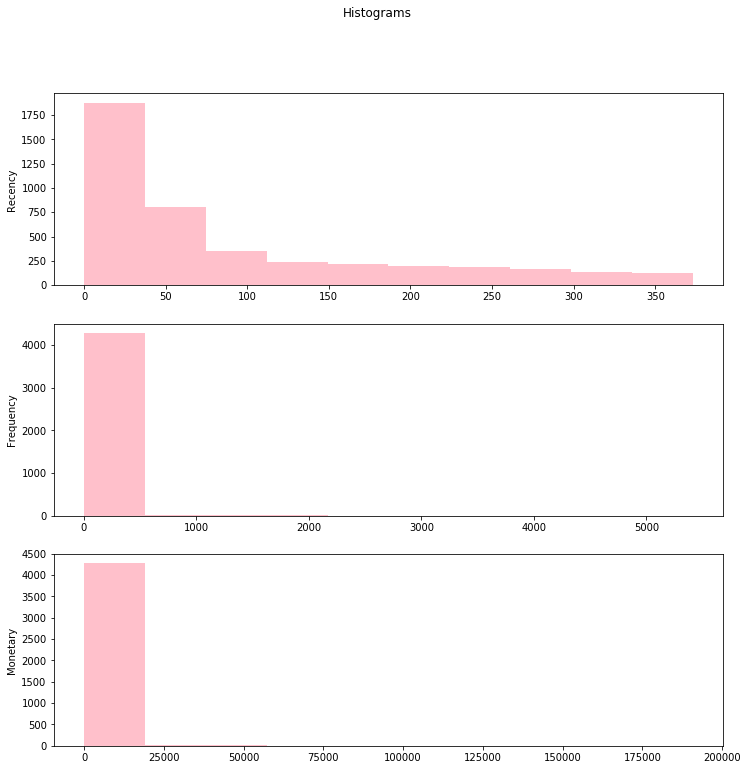

In [58]:
fig, (ax4, ax5, ax6) = plt.subplots(3)
fig.suptitle('Histograms')
rfm_sgmnt.Recency.plot.hist(ax = ax4, figsize = (12,12), color='pink');
rfm_sgmnt.Frequency.sort_values().plot.hist(ax = ax5, color='pink');
rfm_sgmnt.Monetary.sort_values().plot.hist(ax = ax6, color='pink');
ax4.set_ylabel('Recency')
ax5.set_ylabel('Frequency')
ax6.set_ylabel('Monetary')

The Frequency and Monetary values do appear to have outliers, which are causing the data to be skewed. So we shall remove these outliers by sorting these values and cropping off the top 38 values from the dataset, just to view.

Eventually, we shall transform the data,

The resulting histograms after removing those outliers are shown below:

Text(0, 0.5, 'Monetary')

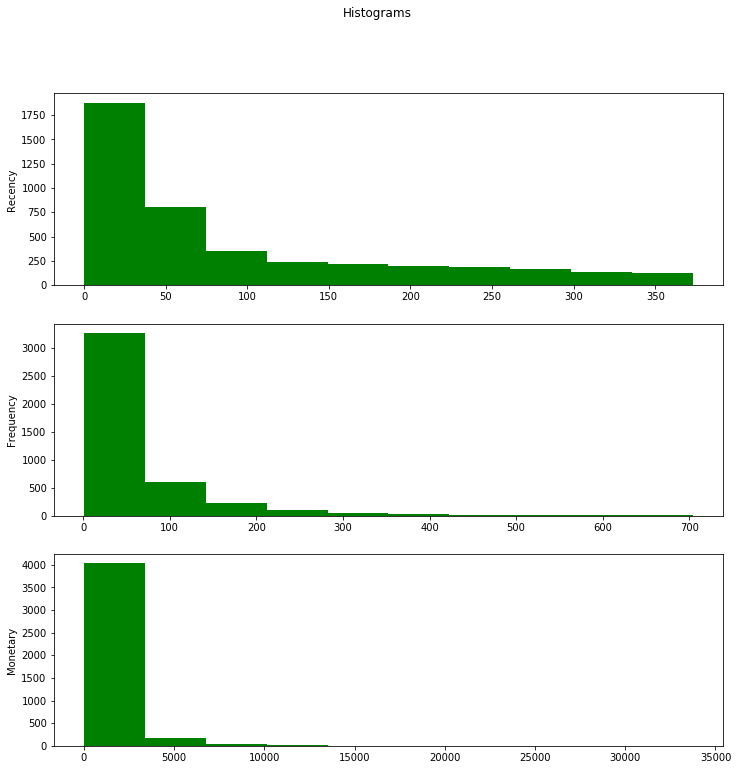

In [59]:
fig, (ax4, ax5, ax6) = plt.subplots(3)
fig.suptitle('Histograms')
rfm_sgmnt.Recency.plot.hist(ax = ax4, figsize = (12,12), color='green');
rfm_sgmnt.Frequency.sort_values().head(4300).plot.hist(ax = ax5, color='green');
rfm_sgmnt.Monetary.sort_values().head(4300).plot.hist(ax = ax6, color='green');
ax4.set_ylabel('Recency')
ax5.set_ylabel('Frequency')
ax6.set_ylabel('Monetary')

# Project Task: Week 3
Data Modeling :

1. Create clusters using k-means clustering algorithm.

a. Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.

b. Decide the optimum number of clusters to be formed.

c. Analyze these clusters and comment on the results.

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [61]:
rfm_adj_raw = rfm_sgmnt.loc[:, 'Recency':'Monetary']
rfm_adj_raw.head()

,Recency,Frequency,Monetary
0,325,1,77183.60
1,1,132,3124.96
2,74,20,1009.88
3,18,50,1344.17
4,309,11,213.30


In [62]:
rfm_scores = pd.DataFrame()
rfm_scores['R'] = rfm_sgmnt['Recency'].apply(Rfunction, args=('Recency', quartiles))
rfm_scores['F'] = rfm_sgmnt['Frequency'].apply(FMfunction, args=('Frequency', quartiles))
rfm_scores['M'] = rfm_sgmnt['Monetary'].apply(FMfunction, args=('Monetary', quartiles))

scaler = StandardScaler().fit(rfm_adj_raw)
rfm_adj_std = pd.DataFrame(scaler.transform(rfm_adj_raw), columns=rfm_adj_raw.columns)
rfm_adj_std.head()

C:\ProgramData\Anaconda31\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda31\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


,Recency,Frequency,Monetary
0,2.321418,-0.396229,11.783443
1,-0.906915,0.428555,0.259785
2,-0.179543,-0.276604,-0.069326
3,-0.737527,-0.087722,-0.017310
4,2.161994,-0.333269,-0.193275


Now we shall determine the optimal number of clusters to be used for segmenting the customers. We do this by plotting the error (distortions) against a selected range of clusters

In [63]:
distortions = []
K = range(1, 15)

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(rfm_adj_std)
    distortions.append(kmeans.inertia_)

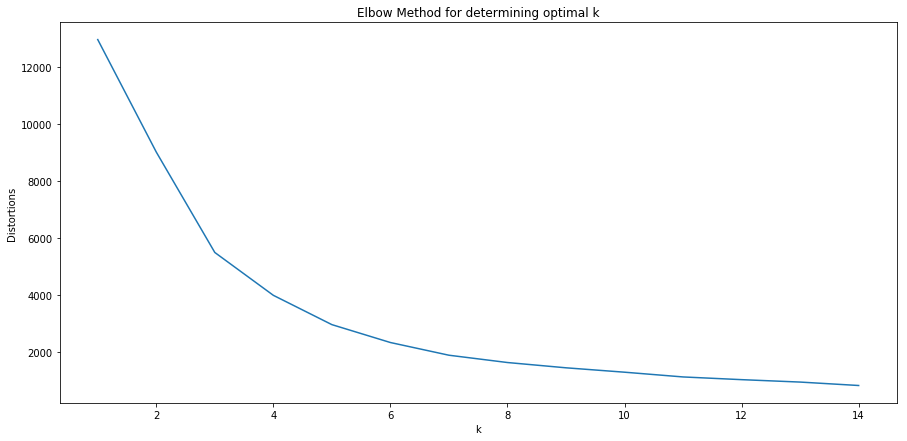

In [64]:
plt.figure(figsize=(15, 7))
plt.plot(K, distortions)
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('Elbow Method for determining optimal k')
plt.show()

In [68]:
min(distortions)

812.932302769799

In [69]:
model = KMeans(n_clusters=13, random_state=42)
model.fit(rfm_adj_std)
model.labels_.shape

(4320,)

In [70]:
rfm_adj_std['Cluster'] = model.labels_
rfm_adj_std['CustomerID'] = rfm_sgmnt['CustomerID']
rfm_adj_std.head()

,Recency,Frequency,Monetary,Cluster,CustomerID
0,2.321418,-0.396229,11.783443,7,12346.0
1,-0.906915,0.428555,0.259785,6,12347.0
2,-0.179543,-0.276604,-0.069326,5,12348.0
3,-0.737527,-0.087722,-0.017310,0,12349.0
4,2.161994,-0.333269,-0.193275,1,12350.0


In [71]:
rfm_adj_std['Profile'] = model.labels_
rfm_adj_std['Profile'].replace({0: "Low",
                                1: "Low",
                                2: "Low",
                                3: "Low",
                                4:"Middle",
                                5: "Middle",
                                6: "Middle",
                                7: "High",
                                8: "High",
                                9: "High",
                                10: "High",
                                11: "High",
                                12: "High"}, inplace = True)